Dataset Loaded:
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro... 



[nltk_data] Downloading package stopwords to /Users/ak/nltk_data...


Sample cleaned text:
                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          clean_text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though   

Train size: (4457, 9403)
Test size : (1115, 9403) 

Class distribution:
label
0    4825
1     747
Name: count, dtype: int64 



[nltk_data]   Unzipping corpora/stopwords.zip.


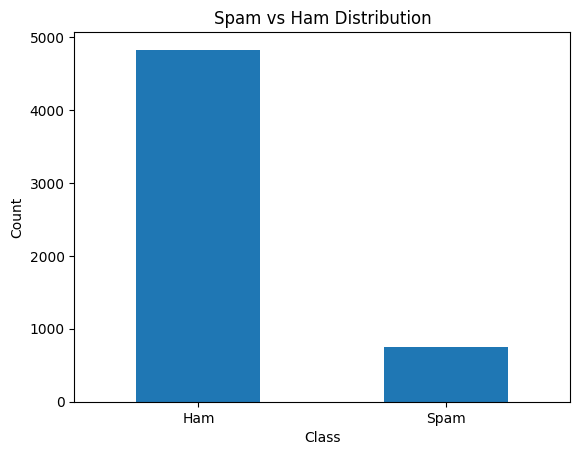

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re

df = pd.read_csv("spam.csv", encoding="latin-1")
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

print("Dataset Loaded:")
print(df.head(), "\n")


df['label'] = df['label'].map({'spam': 1, 'ham': 0})


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess)

print("Sample cleaned text:")
print(df[['text', 'clean_text']].head(), "\n")


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape, "\n")


print("Class distribution:")
print(df['label'].value_counts(), "\n")

df['label'].value_counts().plot(kind='bar')
plt.title("Spam vs Ham Distribution")
plt.xticks([0,1], ['Ham', 'Spam'], rotation=0)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()